In [1]:
# this notebook contains code for a default version of the BIGANTR model

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create a profile
dx = 500
x = np.arange(0, 50000, dx)
x_node = x + (dx/2)

# add some elevation
Hstar = 0.5 # depth decay
etab = np.zeros(len(x)) # bedrock elevation
etab[:] = np.linspace(1, 0.1, len(x)) # start with slight bedrock slope
H = Hstar + np.zeros(len(x)) # alluvium thickness
eta = etab + H # topography

In [4]:
# define constants and other parameters
K = 1e-6 # erodibility
beta = 0.0005 # sediment attrition (default = 0.0005)
zeta = 0.001 # bedrock abrasion
r = 5. # runoff rate
U = 0.0001 # uplift or baselevel fall rate
I = 0.01 # intermittency
phi = 0.1 # porosity
D = 0.01 # grain size
gamma = 0.5 # fraction of plucked material that becomes coarse

kQs = 0.041 # sed transport coefficient
kxb = 25 # valley width coefficient
Pxb = 1./5. # valley width exponment
kb = 8.3e-8 # channel width coefficient

B_valley = kxb * (x_node**Pxb) # valley width
A = (1./3.) * (x**2)
Q = r * A

dt = 35 # timestep (default = 35)

In [5]:
def BIGANTR(x, dx, 
            K, beta, zeta, 
            gamma, D, phi, Hstar, 
            kQs, I, r, U, 
            etab, H, eta, 
            B_valley, Q, 
            dt, num_steps = 1):
    
    # set up run duration and start counting time
    run_duration = dt * num_steps
    cum_time = 0.0
    
    # initialize arrays
    Qs = np.zeros(len(x))
    Eb_p = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x)) # lateral sediment supply
    
    # set boundary conditions
    H[-1] = 0
    E[-1] = U
    Qs[0] = 0
    
    # track time
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= U * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        Qs[1:] = kQs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1])
        
        # calc bedrock erosion
        Eb_p[:-1] = K * Q[1:] * S**(7./6.) * alpha[:-1] * I
        Eb_a[:-1] = zeta * Qs[1:] * alpha[:-1]
        Eb[:-1] = (Eb_p[:-1] + Eb_a[:-1]) / B_valley[:-1]
        
        # calc lateral flux
        ql[:-1] = ((Eb[:-1] * gamma)/beta) * (1 - np.exp(-beta * x[1:]/3))
        
        # calc grain attrition
        atr = Qs * beta
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:] - (Eb_p[:-1]*gamma) - ql[:-1])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
    
    # check total time (yrs)
    print(cum_time)
        
    return (dt, S, alpha, Qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta)

In [6]:
#now write a test
num_steps = 3000000

default_run = [x, dx, 
            K, beta, zeta, 
            gamma, D, phi, Hstar,
            kQs, I, r, U,
            etab, H, eta,
            B_valley, Q,
            dt, num_steps]

# and run it
(dt, S, alpha, Qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta) = BIGANTR(*default_run)

105000000.0


In [7]:
# check that we have reached steady state condition by printing out the bedrock erosion rate
Eb

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 0.e+00])

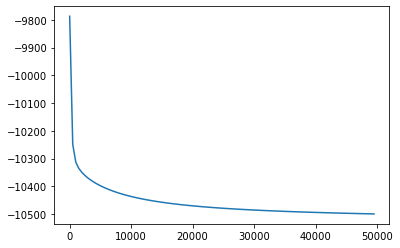

In [8]:
plt.plot(x, eta)

In [8]:
# # save slopes
# slope_def = np.savetxt('slope_def.csv', S, delimiter = ',')

# # save total elevs
# eta_def = np.savetxt('eta_def.csv', eta, delimiter = ',')

# # save sed thickness
# H_def = np.savetxt('H_def.csv', H, delimiter = ',')

# # save Qs
# Qs_def = np.savetxt('Qs_def.csv', Qs, delimiter = ',')